# <center> Exercise 9

## Required Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

## Load Dataset:

In [2]:
path = 'heart.csv'
data = load_prepare_data(path)

Show dataset:
              0      1      2      3      4
age        63.0   37.0   41.0   56.0   57.0
sex         1.0    1.0    0.0    1.0    0.0
cp          3.0    2.0    1.0    1.0    0.0
trestbps  145.0  130.0  130.0  120.0  120.0
chol      233.0  250.0  204.0  236.0  354.0
fbs         1.0    0.0    0.0    0.0    0.0
restecg     0.0    1.0    0.0    1.0    1.0
thalach   150.0  187.0  172.0  178.0  163.0
exang       0.0    0.0    0.0    0.0    1.0
oldpeak     2.3    3.5    1.4    0.8    0.6
slope       0.0    0.0    2.0    2.0    2.0
ca          0.0    0.0    0.0    0.0    0.0
thal        1.0    2.0    2.0    2.0    2.0
target      1.0    1.0    1.0    1.0    1.0
--------------------------------------------------
Informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  


## Explanation  of dataset features:

- age: The age of the patient in years.
- sex: The sex of the patient (0 = female, 1 = male).
- cp: Chest pain type experienced by the patient, which can be classified into four categories: typical angina (1), atypical angina (2), non-anginal pain (3), or asymptomatic (4).
- trestbps: The resting blood pressure (in mm Hg) of the patient upon admission to the hospital.
- chol: The serum cholesterol level (in mg/dl) of the patient.
- fbs: The fasting blood sugar level (> 120 mg/dl) of the patient, which is either 1 (true) or 0 (false).
- restecg: The resting electrocardiographic results of the patient, which can be classified into three categories: normal (0), having ST-T wave abnormality (1), or showing probable or definite left ventricular hypertrophy (2).
- thalach: The maximum heart rate achieved by the patient during exercise.
- exang: Whether or not the patient experiences exercise-induced angina (1 = yes, 0 = no).
- oldpeak: The ST depression induced by exercise relative to rest.
- slope: The slope of the peak exercise ST segment, which can be classified into three categories: upsloping (1), flat (2), or downsloping (3).
- ca: The number of major vessels (0-3) colored by fluoroscopy.
- thal: A blood disorder called thalassemia, which is characterized by abnormal hemoglobin production. It is classified into three categories: normal (3), fixed defect (6), or reversible defect (7).
- target: Angiography Diagnosis of heart disease (1 = disease, 0 = no disease).

This dataset is commonly known as the "Heart Disease UCI" dataset, and is often used in machine learning and data science projects to develop models that can predict the presence of heart disease based on the patient's characteristics.

In [3]:
print(f'0: No disease, 1: disease \n{data.target.value_counts()}')
print(30*'-')
print(f'0: Famale, 1: Male \n{data.sex.value_counts()}')
print(30*'-')
print(f'Mean of target respect to sex: {data.groupby("sex")["target"].mean()}')

0: No disease, 1: disease 
1    165
0    138
Name: target, dtype: int64
------------------------------
0: Famale, 1: Male 
1    207
0     96
Name: sex, dtype: int64
------------------------------
Mean of target respect to sex: sex
0    0.750000
1    0.449275
Name: target, dtype: float64


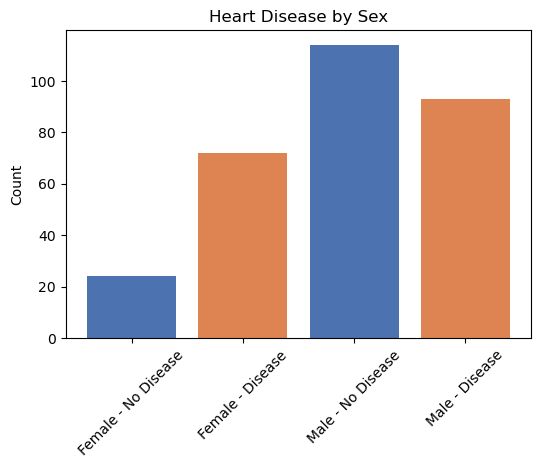

In [4]:
# Group the data by sex and target
grouped = data.groupby(["sex", "target"])["age"].count().reset_index()

# Create a bar chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(grouped.index, grouped["age"], color=["#4c72b0", "#dd8452"])
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(["Female - No Disease", 
                    "Female - Disease", 
                    "Male - No Disease", 
                    "Male - Disease"], rotation=45)
ax.set_ylabel("Count")
ax.set_title("Heart Disease by Sex")
plt.show()

## Split Dependent and Indepentent columns:

In [5]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Classification phase:

### 1. Decision Tree

Please enter your classifier: decision tree(dt)/knn/svm/random forest(rf)/adaboost(ada)dt
Please enter the maximum depth of the decision tree (default is None): 
Please enter the criterion for the decision tree (default is gini): gini
--------------------------------------------------
Reports:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

--------------------------------------------------
Confusion Matrix:
[[26  3]
 [ 7 25]]
--------------------------------------------------


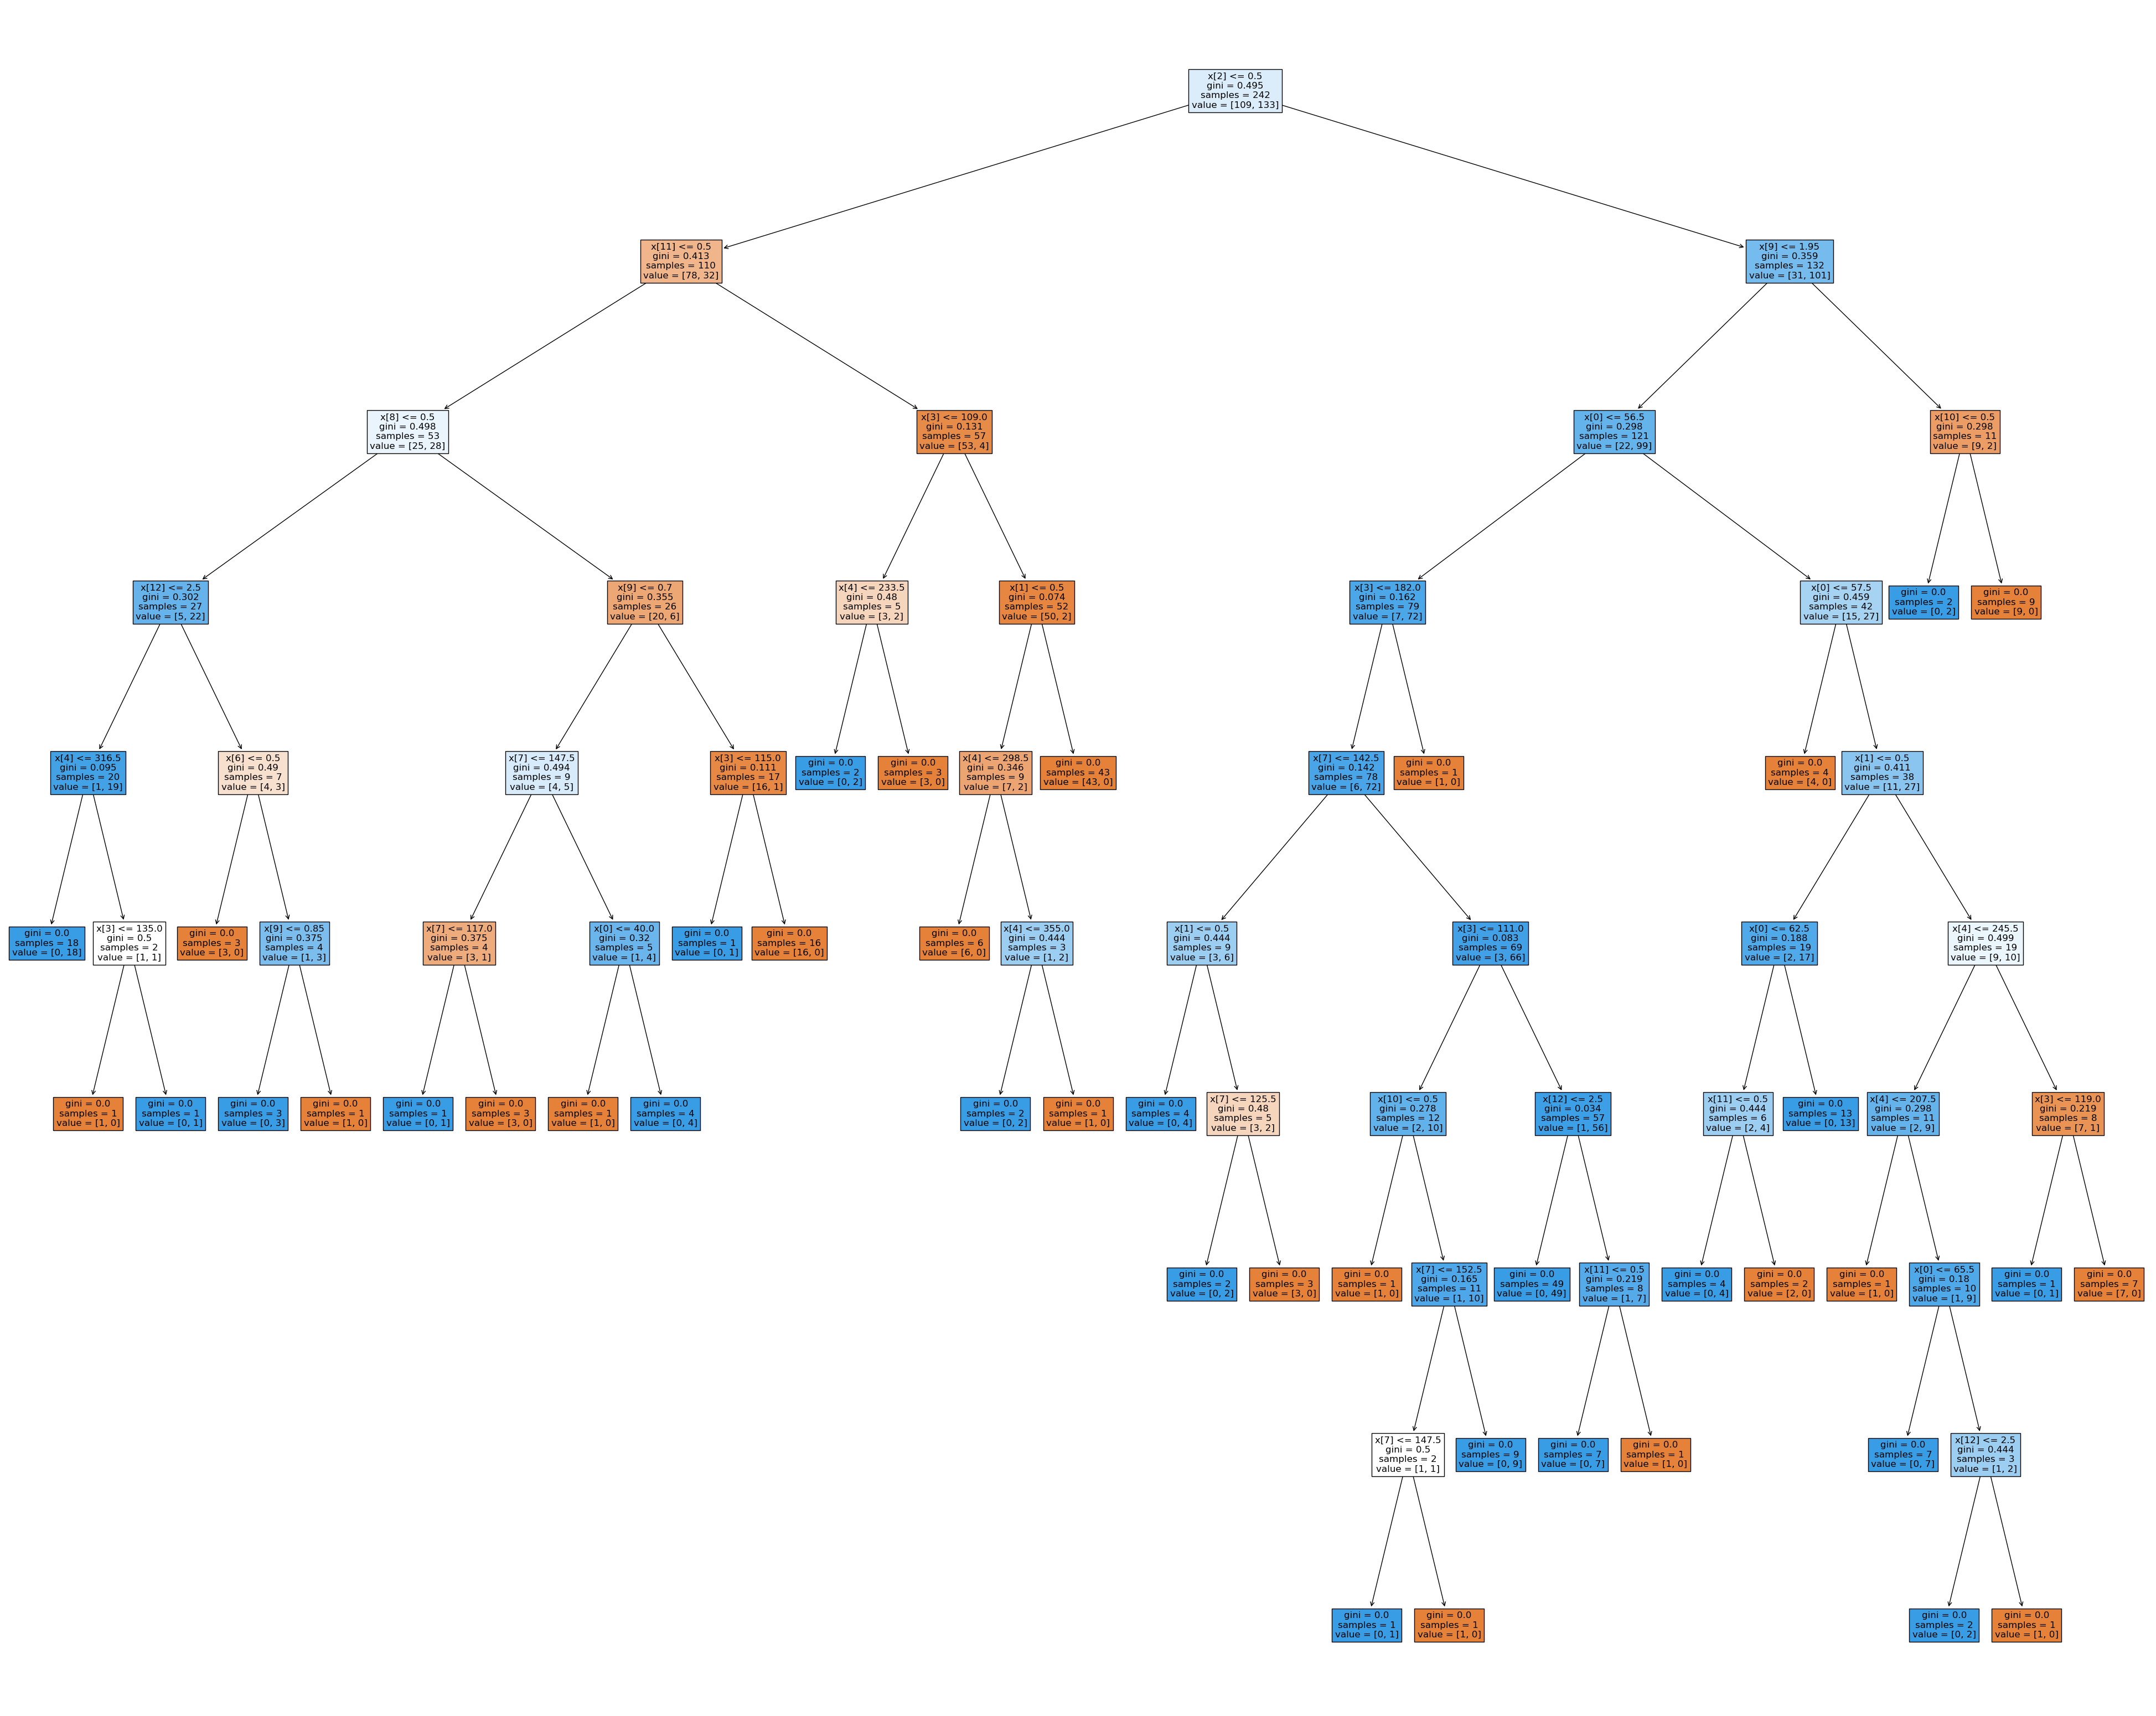

Classifier is loaded successfully.


In [6]:
dt_clf = load_classifier(X, y)

### 2. KNearestNeighbor(KNN)

In [7]:
knn_clf = load_classifier(X, y)

Please enter your classifier: decision tree(dt)/knn/svm/random forest(rf)/adaboost(ada)knn
Please enter the number of neighbors for KNN (default is 5): 7
Please enter the type of weight function for KNN (default is uniform): uniform
--------------------------------------------------
Reports:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        29
           1       0.71      0.75      0.73        32

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61

--------------------------------------------------
Confusion Matrix:
[[19 10]
 [ 8 24]]
--------------------------------------------------
Classifier is loaded successfully.


### 3. Suport Vector Machine(SVM)

In [8]:
svc_clf = load_classifier(X, y)

Please enter your classifier: decision tree(dt)/knn/svm/random forest(rf)/adaboost(ada)svm
Please enter the type of kernel for SVM (default is rbf): rbf
Please enter the regularization parameter for SVM (default is 1.0): 0.5
--------------------------------------------------
Reports:
              precision    recall  f1-score   support

           0       0.80      0.28      0.41        29
           1       0.59      0.94      0.72        32

    accuracy                           0.62        61
   macro avg       0.69      0.61      0.57        61
weighted avg       0.69      0.62      0.57        61

--------------------------------------------------
Confusion Matrix:
[[ 8 21]
 [ 2 30]]
--------------------------------------------------
Classifier is loaded successfully.


### 4. RandomForest

In [9]:
rf_clf = load_classifier(X, y)

Please enter your classifier: decision tree(dt)/knn/svm/random forest(rf)/adaboost(ada)rf
Please enter the number of trees for random forest (default is 100): 150
Please enter the maximum depth of each tree for random forest (default is None): 
Please enter the criterion for random forest (default is gini): gini
--------------------------------------------------
Reports:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

--------------------------------------------------
Confusion Matrix:
[[24  5]
 [ 4 28]]
--------------------------------------------------
Classifier is loaded successfully.


### 5. AdaBoost

In [10]:
ada_clf = load_classifier(X, y)

Please enter your classifier: decision tree(dt)/knn/svm/random forest(rf)/adaboost(ada)ada
Please enter the number of estimators for AdaBoost (default is 50): 50
Please enter the learning rate for AdaBoost (default is 1.0): 1.5
--------------------------------------------------
Reports:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61

--------------------------------------------------
Confusion Matrix:
[[26  3]
 [ 8 24]]
--------------------------------------------------
Classifier is loaded successfully.


## GridSearch:

For more detail about parameters of classifier methods, you can visit the following links:
    
- DecisionTree: 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- KNN: 
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- SVM: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

- RandomFarest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

- AdaBoost: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

### 1. Decision Tree

In [11]:
params = {
    'criterion': ['entropy', 'log_loss'],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [None, 3, 5]
}
cross_validation = 5

scoring_list = ['f1', 'accuracy', 'recall']
perform_grid_search(X, y, dt_clf, params, scoring_list, cross_validation)

Scoring f1: 

Fitting 5 folds for each of 18 candidates, totalling 90 fits
The best Estimators: DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')
------------------------------
The best Score: 0.8330773075000961
------------------------------
The best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt'}
##################################################
Scoring accuracy: 

Fitting 5 folds for each of 18 candidates, totalling 90 fits
The best Estimators: DecisionTreeClassifier(criterion='entropy', max_depth=3)
------------------------------
The best Score: 0.8149726775956283
------------------------------
The best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None}
##################################################
Scoring recall: 

Fitting 5 folds for each of 18 candidates, totalling 90 fits
The best Estimators: DecisionTreeClassifier(criterion='entropy', max_depth=3)
------------------------------
The best Scor

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'log_loss'],
                         'max_depth': [None, 3, 5],
                         'max_features': [None, 'sqrt', 'log2']},
             scoring='recall', verbose=1)

### 2. KNearestNeighbor(KNN)

In [12]:
params = {
    'n_neighbors': [3, 5, 7, 11, 20],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}
cross_validation = 5

scoring_list = ['f1', 'accuracy', 'recall']
perform_grid_search(X, y, knn_clf, params, scoring_list, cross_validation)


Scoring f1: 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best Estimators: KNeighborsClassifier(n_neighbors=11, weights='distance')
------------------------------
The best Score: 0.6975301081853439
------------------------------
The best Parameters: {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}
##################################################
Scoring accuracy: 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best Estimators: KNeighborsClassifier(n_neighbors=11, weights='distance')
------------------------------
The best Score: 0.6569945355191258
------------------------------
The best Parameters: {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}
##################################################
Scoring recall: 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best Estimators: KNeighborsClassifier(n_neighbors=20, weights='distance')
------------------------------
The best Score: 0.7333333333333

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 11, 20],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

### 3. Suport Vector Machine(SVM)

In [13]:
params = {
    'C': [1, 5],
    'kernel': ['linear'],
    'gamma': ['auto', 0.1, 0.5]
}
cross_validation = 5

scoring_list = ['f1', 'accuracy', 'recall']
perform_grid_search(X, y, svc_clf, params, scoring_list, cross_validation)


Scoring f1: 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
The best Estimators: SVC(C=1, gamma='auto', kernel='linear')
------------------------------
The best Score: 0.8494781976885468
------------------------------
The best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
##################################################
Scoring accuracy: 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
The best Estimators: SVC(C=1, gamma='auto', kernel='linear')
------------------------------
The best Score: 0.8283060109289618
------------------------------
The best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
##################################################
Scoring recall: 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
The best Estimators: SVC(C=1, gamma='auto', kernel='linear')
------------------------------
The best Score: 0.890909090909091
------------------------------
The best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'l

GridSearchCV(cv=5, estimator=SVC(C=0.5), n_jobs=-1,
             param_grid={'C': [1, 5], 'gamma': ['auto', 0.1, 0.5],
                         'kernel': ['linear']},
             scoring='recall', verbose=1)

### 4. RandomForest

In [14]:
params = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': [None, 'sqrt'],
    'max_depth': [None, 3, 5]
}
cross_validation = 5

scoring_list = ['f1', 'accuracy', 'recall']
perform_grid_search(X, y, rf_clf, params, scoring_list, cross_validation)

Scoring f1: 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best Estimators: RandomForestClassifier(max_depth=3, n_estimators=300)
------------------------------
The best Score: 0.8704747881763341
------------------------------
The best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 300}
##################################################
Scoring accuracy: 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best Estimators: RandomForestClassifier(max_depth=3)
------------------------------
The best Score: 0.8480874316939891
------------------------------
The best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}
##################################################
Scoring recall: 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best Estimators: RandomForestClassifier(max_depth=3, max_features=None)
------------------------------
The best Score: 0.9090909090909092
--------------------------

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=150),
             n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5],
                         'max_features': [None, 'sqrt'],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='recall', verbose=1)

### 5. AdaBoost

In [15]:
params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [1.0, 1.5, 2.0],
    'algorithm': ['SAMME', 'SAMME.R']
}
scoring_list = ['f1', 'accuracy', 'recall']
cross_validation = 5
perform_grid_search(X, y, ada_clf, params, scoring_list, cross_validation)

Scoring f1: 

Fitting 5 folds for each of 18 candidates, totalling 90 fits
The best Estimators: AdaBoostClassifier(algorithm='SAMME', learning_rate=1.5)
------------------------------
The best Score: 0.8436777715038584
------------------------------
The best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 50}
##################################################
Scoring accuracy: 

Fitting 5 folds for each of 18 candidates, totalling 90 fits
The best Estimators: AdaBoostClassifier(algorithm='SAMME', learning_rate=1.5)
------------------------------
The best Score: 0.8214754098360656
------------------------------
The best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 50}
##################################################
Scoring recall: 

Fitting 5 folds for each of 18 candidates, totalling 90 fits
The best Estimators: AdaBoostClassifier(algorithm='SAMME', learning_rate=1.5)
------------------------------
The best Score: 0.88484848484848

GridSearchCV(cv=5, estimator=AdaBoostClassifier(learning_rate=1.5), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1.0, 1.5, 2.0],
                         'n_estimators': [50, 100, 150]},
             scoring='recall', verbose=1)